In [1]:
# scratch code to get ocn forcing .nc files

#from datetime import datetime

import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import matplotlib.pyplot as plt
#import numpy as np
#import scipy.ndimage as ndimage
#import xarray as xr
#import netCDF4 as nc
#from scipy.interpolate import RegularGridInterpolator


In [2]:


sys.path.append('/Users/mspydell/research/FF2024/models/SDPM_mss/PFM/sdpm_py_util')

import atm_functions as atmfuns
import ocn_functions as ocnfuns
import grid_functions as grdfuns

# row after setting suitable values for theta_b, theta_s, Tcline, Nz, hraw, eta, we could probably run the line:



In [3]:
run_type = 'forecast'
# the year, month, day of the 
yyyymmdd='20240706'
# the hour in Z of the forecast, hycom has forecasts once per day starting at 1200Z
hhmm='1200'
# we will use hycom for IC and BC
ocn_mod = 'hycom'
# we will use nam_nest for the atm forcing
atm_mod = 'nam_nest'
# we will use opendap, and netcdf to grab ocn, and atm data
get_method = 'open_dap_nc'

# get the ROMS grid as a dict
fngr = '/Users/mspydell/research/FF2024/models/SDPM_mss/PFM_user/grids/GRID_SDTJRE_LV1.nc'
RMG = grdfuns.roms_grid_to_dict(fngr)



In [4]:
# make the atm .nc file here.
# fn_out is the name of the atm.nc file used by roms
fn_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/atm_test_file_v2.nc'
# make a switch to see if this file exists. If it exists, we don't need to run the code in this block
# first the atm data
# get the data as a dict
# need to specify hhmm because nam forecast are produced at 6 hr increments
ATM = atmfuns.get_atm_data_as_dict(yyyymmdd,hhmm,run_type,atm_mod,get_method)
# put in a function to check to make sure that all the data is good
# put in a function to plot the raw atm data if we want to
# put the atm data on the roms grid, and rotate the velocities
# everything in this dict turn into the atm.nc file
ATM_R  = atmfuns.get_atm_data_on_roms_grid(ATM,RMG)
# output a netcdf file of ATM_R
atmfuns.atm_roms_dict_to_netcdf(ATM_R,fn_out)
# put in a function to plot the atm.nc file if we want to

getting atm forecast for:
[datetime.datetime(2024, 7, 6, 12, 0) datetime.datetime(2024, 7, 6, 15, 0)
 datetime.datetime(2024, 7, 6, 18, 0) datetime.datetime(2024, 7, 6, 21, 0)
 datetime.datetime(2024, 7, 7, 0, 0) datetime.datetime(2024, 7, 7, 3, 0)
 datetime.datetime(2024, 7, 7, 6, 0) datetime.datetime(2024, 7, 7, 9, 0)
 datetime.datetime(2024, 7, 7, 12, 0) datetime.datetime(2024, 7, 7, 15, 0)
 datetime.datetime(2024, 7, 7, 18, 0) datetime.datetime(2024, 7, 7, 21, 0)
 datetime.datetime(2024, 7, 8, 0, 0) datetime.datetime(2024, 7, 8, 3, 0)
 datetime.datetime(2024, 7, 8, 6, 0) datetime.datetime(2024, 7, 8, 9, 0)
 datetime.datetime(2024, 7, 8, 12, 0) datetime.datetime(2024, 7, 8, 15, 0)
 datetime.datetime(2024, 7, 8, 18, 0) datetime.datetime(2024, 7, 8, 21, 0)
 datetime.datetime(2024, 7, 9, 0, 0)]
<xarray.Dataset>
Dimensions:     (tair_time: 21, er: 390, xr: 253, pair_time: 21, qair_time: 21,
                 wind_time: 21, rain_time: 21, srf_time: 21, lrf_time: 21,
                 time:

In [6]:
# make the ocn IC and BC .nc files here
# fn*_out are the names of the the IC.nc and BC.nc roms files
fn_ic_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_test_IC_file.nc'
fn_bc_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_test_BC_file.nc'

# note, this function is hard wired to return 2.5 days of data
# also note that the first time of this data is yyyymmdd 12:00Z
# so we grab nam atm forecast data starting at this hour too.
OCN = ocnfuns.get_ocn_data_as_dict(yyyymmdd,run_type,ocn_mod,get_method)
# note this takes 24.5 minutes to run on my laptop
# 3 times this timed out
# will likely need to use a wget method and directly download .nc files (arh)
# maybe downloading the netcdf file would be quicker? 


### should work to here! ####


Note:Caching=1


ocn forecast data is being grabbed for:
[datetime.datetime(2024, 7, 3, 12, 0) datetime.datetime(2024, 7, 3, 15, 0)
 datetime.datetime(2024, 7, 3, 18, 0) datetime.datetime(2024, 7, 3, 21, 0)
 datetime.datetime(2024, 7, 4, 0, 0) datetime.datetime(2024, 7, 4, 3, 0)
 datetime.datetime(2024, 7, 4, 6, 0) datetime.datetime(2024, 7, 4, 9, 0)
 datetime.datetime(2024, 7, 4, 12, 0) datetime.datetime(2024, 7, 4, 15, 0)
 datetime.datetime(2024, 7, 4, 18, 0) datetime.datetime(2024, 7, 4, 21, 0)
 datetime.datetime(2024, 7, 5, 0, 0) datetime.datetime(2024, 7, 5, 3, 0)
 datetime.datetime(2024, 7, 5, 6, 0) datetime.datetime(2024, 7, 5, 9, 0)
 datetime.datetime(2024, 7, 5, 12, 0) datetime.datetime(2024, 7, 5, 15, 0)
 datetime.datetime(2024, 7, 5, 18, 0) datetime.datetime(2024, 7, 5, 21, 0)]


In [12]:
# save the OCN dict so that we can restart the python session
# and not have to worry about opendap timing out
with open(fnout,'wb') as fp:
    pickle.dump(OCN,fp)
    print('OCN dict saved with pickle')

OCN dict saved with pickle


In [4]:
fnout='/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_hycom_dict_file.pkl'

with open(fnout,'rb') as fp:
    OCN = pickle.load(fp)


In [5]:
# put the ocn data on the roms grid
OCN_R  = ocnfuns.hycom_to_roms_latlon(OCN,RMG)


In [6]:
print(OCN_R.keys())

dict_keys(['surf_el', 'sal', 'temp', 'ubar', 'vbar', 'lat_rho', 'lon_rho', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'depth', 'ocean_time', 'ocean_time_ref', 'urm', 'vrm'])


In [6]:
# get the OCN_IC dictionary
OCN_IC = ocnfuns.ocn_r_2_ICdict(OCN_R,RMG)


In [18]:
print(OCN_IC.keys())

dict_keys(['ocean_time', 'surf_el', 'ubar', 'vbar', 'lat_rho', 'lon_rho', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'ocean_time_ref'])


In [ ]:
# get the OCN_BC dictionary
OCN_BC = ocnfuns.ocn_r_2_BCdict(OCN_R,RMG)

In [7]:
ilat = 100
ilon = 145
#print(OCN_R.keys())
print(np.shape(OCN_R['urm']))
dum = OCN_R['urm'][0,:,ilat,ilon]

#dum = OCN_R['ubar'][0,:,:]
dum2 = 0*dum
dum2[np.isnan(dum)==1] = 1
print(np.sum(dum2))
print(np.prod(dum.shape))

(20, 40, 390, 252)
1.0
40


1
39
the raw mean of the good vels is:
0.1443779408130396
the depth average velocity calculated in ofun is:
0.02832434473917618
simple depth average velocity is:
0.029926379849946033
midpoint formula depth avg vel is:
0.02703212816462368
looks like the ubar from ocnfun is good!!!


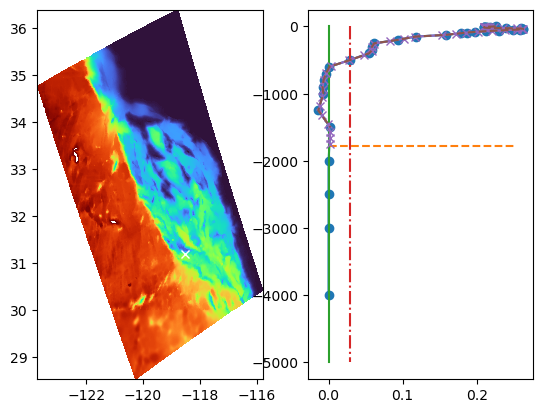

In [16]:
from scipy.interpolate import interp1d
import util_functions as utlfuns 
from util_functions import s_coordinate_4
from scipy.interpolate import RegularGridInterpolator

hraw = None
h = RMG['h']
eta = 0 * h
zrom = s_coordinate_4(h, 3.0 , 8.0 , 50.0 , 40, hraw=hraw, zeta=eta)
zr = np.squeeze(zrom.z_r[0,:,:,:])

fig, ax = plt.subplots(nrows=1, ncols=2)
yy = OCN_R['depth'][:]
ilat = 100
ilon = 145

plevs=np.arange(0,4500,1)
cmap=plt.get_cmap('turbo')
plt.set_cmap(cmap)
cset1=ax[0].contourf(RMG['lon_rho'],RMG['lat_rho'],RMG['h'],plevs)
ax[0].plot(RMG['lon_rho'][ilat,ilon],RMG['lat_rho'][ilat,ilon],'wx')

xx = OCN_R['urm'][0,:,ilat,ilon]
ib = np.argwhere(np.isnan(xx))
ig = np.argwhere(np.isfinite(xx))
print(len(ib))
print(len(ig))

#Fz2 = RegularGridInterpolator(-yy,xx)

Fz = interp1d(-yy,xx,bounds_error=False,kind='linear',fill_value=(xx[0],xx[-1]))
znew = zr[:,ilat,ilon]
fnew = Fz(znew)
#fnew = np.interp(-yy,xx,znew)
#fnew2 = Fz2(znew)

#setattr(Fz,'values',OCN_R['vrm'][0,:,ilat,ilon])
#vnew = Fz(znew)


ax[1].plot(xx,-yy,'-o')
hrm = RMG['h'][ilat,ilon]
#hrm2 = np.max(xx)
#hrm1 = np.min(xx)
ax[1].plot([0,.25],[-hrm,-hrm],'--')
xx2 = OCN_R['ubar'][0,ilat,ilon]
ax[1].plot([0,0],[-yy[0],-yy[-1]])
ax[1].plot([xx2,xx2],[-yy[0],-yy[-1]],'-.')
ax[1].plot(fnew,znew,'-x')
#ax[1].plot(fnew2,znew,'-+')

hyz = OCN_R['depth']
igu = np.argwhere(hyz <= RMG['h'][ilat,ilon])
ax[1].plot(xx[igu],-yy[igu],'--')

dz = yy[1:]-yy[0:-1]
um = 0.5*( xx[1:] + xx[0:-1] )
ubar2 = np.sum(xx[igu]*dz[igu]) / yy[igu[-1]]
ubar3 = np.sum(xx[igu]*dz[igu]) / hrm
ubar4 = np.sum(um[igu]*dz[igu]) / hrm
print('the raw mean of the good vels is:')
print(np.mean(xx[igu]))
print('the depth average velocity calculated in ofun is:')
print(xx2)
print('simple depth average velocity is:')
print(ubar3)
print('midpoint formula depth avg vel is:')
print(ubar4)
print('looks like the ubar from ocnfun is good!!!')

#ib = np.argwhere(np.isnan(xx))
#ig = np.argwhere(np.isfinite(xx))

#print(np.shape(OCN_R['temp']))
#print(RMG['lat_rho'][ilat,ilon])
#print(RMG['lon_rho'][ilat,ilon])
#print(ib)
#print(yy[ib])
#print(RMG['h'][ilat,ilon])

#print(ig)


[-1.74376387e+03 -1.66600240e+03 -1.56704483e+03 -1.45062593e+03
 -1.32226298e+03 -1.18808313e+03 -1.05383423e+03 -9.24254629e+02
 -8.02806248e+02 -6.91682831e+02 -5.91982137e+02 -5.03947567e+02
 -4.27215028e+02 -3.61029654e+02 -3.04418244e+02 -2.56316292e+02
 -2.15655216e+02 -1.81417770e+02 -1.52669745e+02 -1.28574949e+02
 -1.08399049e+02 -9.15064467e+01 -7.73531500e+01 -6.54776652e+01
 -5.54912372e+01 -4.70682455e+01 -3.99372282e+01 -3.38727697e+01
 -2.86883406e+01 -2.42300889e+01 -2.03715277e+01 -1.70090406e+01
 -1.40581154e+01 -1.14502156e+01 -9.13020775e+00 -7.05426692e+00
 -5.18819786e+00 -3.50611527e+00 -1.98943969e+00 -6.26173840e-01]


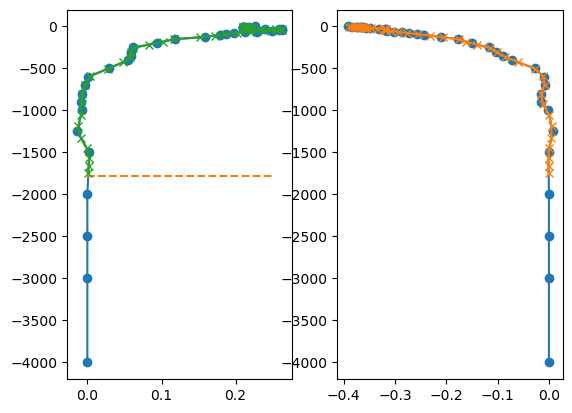

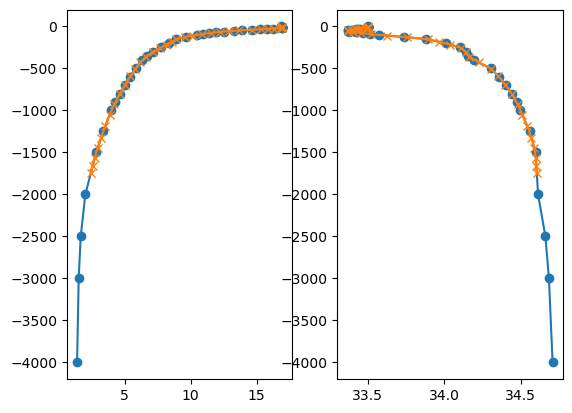

In [14]:
from scipy.interpolate import interp1d
import util_functions as utlfuns 
from util_functions import s_coordinate_4
from scipy.interpolate import RegularGridInterpolator

ilat = 100
ilon = 145
hrm = RMG['h'][ilat,ilon]

hraw = None
h = RMG['h']
eta = 0 * h
zrom = s_coordinate_4(h, 3.0 , 8.0 , 50.0 , 40, hraw=hraw, zeta=eta)
zr = np.squeeze(zrom.z_r[0,:,:,:])

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(OCN_R['urm'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
ax[0].plot([0,.25],[-hrm,-hrm],'--')
ax[0].plot(OCN_IC['u'][:,ilat,ilon],zr[:,ilat,ilon],'-x')
ax[1].plot(OCN_R['vrm'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
#ax[1].plot([0,.25],[-hrm,-hrm],'--')
ax[1].plot(OCN_IC['v'][:,ilat,ilon],zr[:,ilat,ilon],'-x')

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(OCN_R['temp'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
#ax[2].plot([0,.25],[-hrm,-hrm],'--')
ax[0].plot(OCN_IC['temp'][:,ilat,ilon],zr[:,ilat,ilon],'-x')
ax[1].plot(OCN_R['sal'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
#ax[3].plot([0,.25],[-hrm,-hrm],'--')
ax[1].plot(OCN_IC['sal'][:,ilat,ilon],zr[:,ilat,ilon],'-x')

print(zr[:,ilat,ilon])



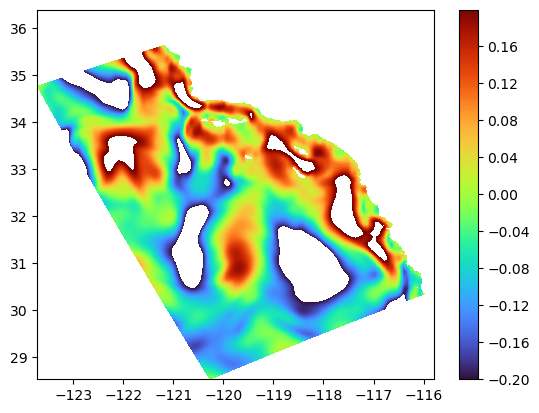

In [14]:
fig, ax = plt.subplots()
plevs=np.arange(-.2,.2,.001)
cmap=plt.get_cmap('turbo')
plt.set_cmap(cmap)
cset1=ax.contourf(RMG['lon_v'],RMG['lat_v'],OCN_R['vrm'][0,0,:,:],plevs)
cbar=fig.colorbar(cset1,ax=ax,orientation='vertical')




In [ ]:
OCN_Rz = ocnfuns.ocn_r_hycomz_2_romsz(OCN_R,RMG)

# output OCN_R dict to roms IC
ocn_roms_dict_to_IC_netcdf
# ouput OCN_R dict to roms BC
ocn_roms_dict_to_BC_netcdf



In [ ]:
make_roms_dotin
make_slurm_script
run_slurm_script